#### Notebook config

In [1]:
# %load ~/software/fullwavepy/fullwavepy/config/jupyter.py 
from fullwavepy import * # Load modules imported in fullwavepy/__init__.py
# -----------------------------------------------------------------------------
# Set aliases of frequently used jupyter magic commands
# -----------------------------------------------------------------------------
%alias_magic mi matplotlib -p inline
%alias_magic mn matplotlib -p notebook
# -----------------------------------------------------------------------------
# Set matplotlib backend
# -----------------------------------------------------------------------------
# non-interactive plots displayed in a notebook cell
%matplotlib inline
# interactive plots displayed in a notebook cell
# %matplotlib notebook (interactive version)
# -----------------------------------------------------------------------------
# Set matplotlib style
# ----------------------------------------------------------------------------
plt.style.reload_library()
# a combined style (right overwrites left wherever they overlap):
plt.style.use(['default', 'ggplot'])
# print(plt.style.available) 
# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
# Set up loggers, handlers and load the log_lvl function
from fullwavepy.config.logging import *
# -----------------------------------------------------------------------------
# Set level of log-messages
log_lvl(ERROR) 
# Other options in order of increasing importance and 
# decreasing verbosity:
# TRACE, DEBUG, INFO, WARNING, ERROR, CRITICAL
# or using integers: 0, 10, 20, 30, 40, 50, respectively
# -----------------------------------------------------------------------------
# Autocompleting
# -----------------------------------------------------------------------------
#  Not sure if it works
#%config IPCompleter.greedy=True 
# -----------------------------------------------------------------------------
# Automatically reload modules before execution
#%load_ext autoreload
#%autoreload 2

Created `%mi` as an alias for `%matplotlib inline`.
Created `%mn` as an alias for `%matplotlib notebook`.


In [2]:
xp = PROTEUS()
path_eph = '/home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch08_Kolumbo_volcano'
exe = { 
    'fullwave':  '~/PhD/fullwave3D/rev690/bin/fullwave3D.exe',
    'fullwave_local': '/home/kmc3817/light_PhD/fullwave3D/rev690/bin/fullwave3D.exe',
    'segyprep':  '/home/kmc3817/light_PhD/fullwave3D/segyprep_v3.16/bin/segyprep_v3.16'} 
b01 = xp.box['kol1'].box

In [4]:
path = '/home/kmc3817/c_projects_phd/fwi_sant_kolumbo/'
geom = {'box': [8000.0, 25000.0, -3000.0, 15000.0, 0, 4000.0],
 'dt': 0.0025,
 'dx': 50,
 'ns': 2000}
p14 = ProjInv('p14', path=path, cat=0, **geom)

# Phase plots

### For Toby et al.

In [10]:
dc = p14.o.dc.it[1][4104].read()

/home/kmc3817/software/fullwavepy/fullwavepy/project/files/datalike/ttr.py:215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  (df['selev'] + df['gelev'])**2)


In [17]:
p14.i.rnf.cat()

Content of  /home/kmc3817/c_projects_phd/fwi_sant_kolumbo//p14//inp/p14-Runfile.key : 

    ! May 2019, K. Chrapkiewicz 
    ! THIS RUNFILE CONFORMS TO
    ! FULLWAVE REV. 688 STANDARD
    
    
    ! A. PROBLEM DEFINITION
     problem       : tomography
     domain        : time
     dim           : 3d
     equation      : acoustic
     units         : metric
     anisotropy    : none
     kernel        : low
    
     
    ! B. MODEL DEFINITION
     nx1           : 341
     nx2           : 361
     nx3           : 81
     dx            : 50.0000000
    
     
    ! C. DATA DEFINITION
     ncomp         : 16
     nshots        : 16
     nrecs         : 1481
     maxrc         : 1144
     maxps         : 1
     io            : segy
    
     
    ! D. BOUNDARY CONDITIONS
     btop          : 0
     bbot          : 40
     bleft         : 40
     bright        : 40
     bfront        : 40
     bback         : 40
     
     etop          : 0
     ebot          : 50
     elef          : 5

In [16]:
p14.i.rnf.read_nits()

160

In [11]:
len(dc)

3

In [18]:
p14.o.dc.it[1][4104].fname

'/home/kmc3817/c_projects_phd/fwi_sant_kolumbo//p14//out/p14-SLAVES_DUMPCOMPARE-csref04104-iter00001fwd1.ttr'

In [19]:
len('p14-SLAVES_DUMPCOMPARE-csref04104-iter00001fwd1.ttr')

51

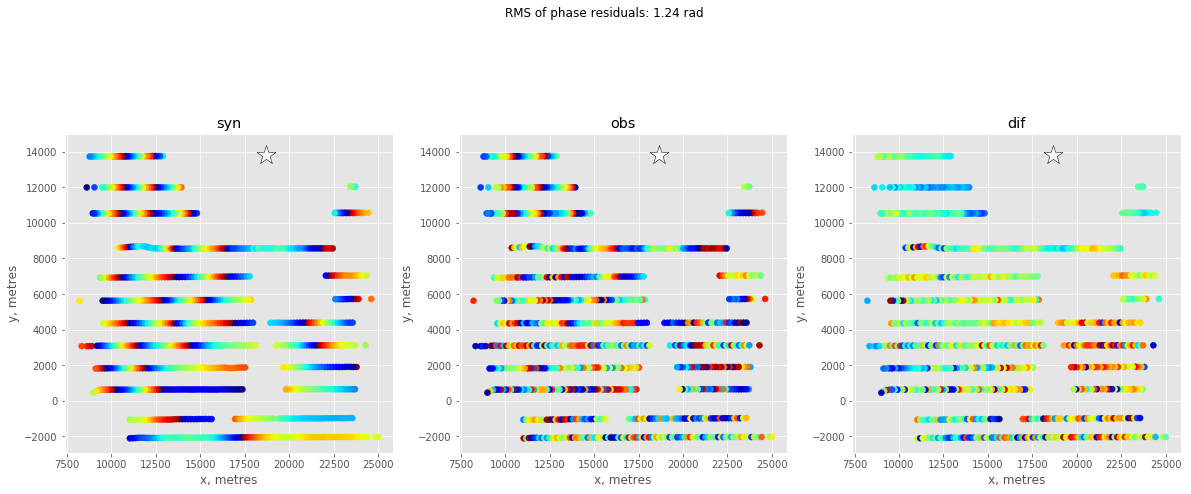

In [12]:
p14.o.dc.it[1][4104].plot_phase(freq=3)

### Across iterations at 3 Hz
For it > 90 fit drops.

#### OBS 105

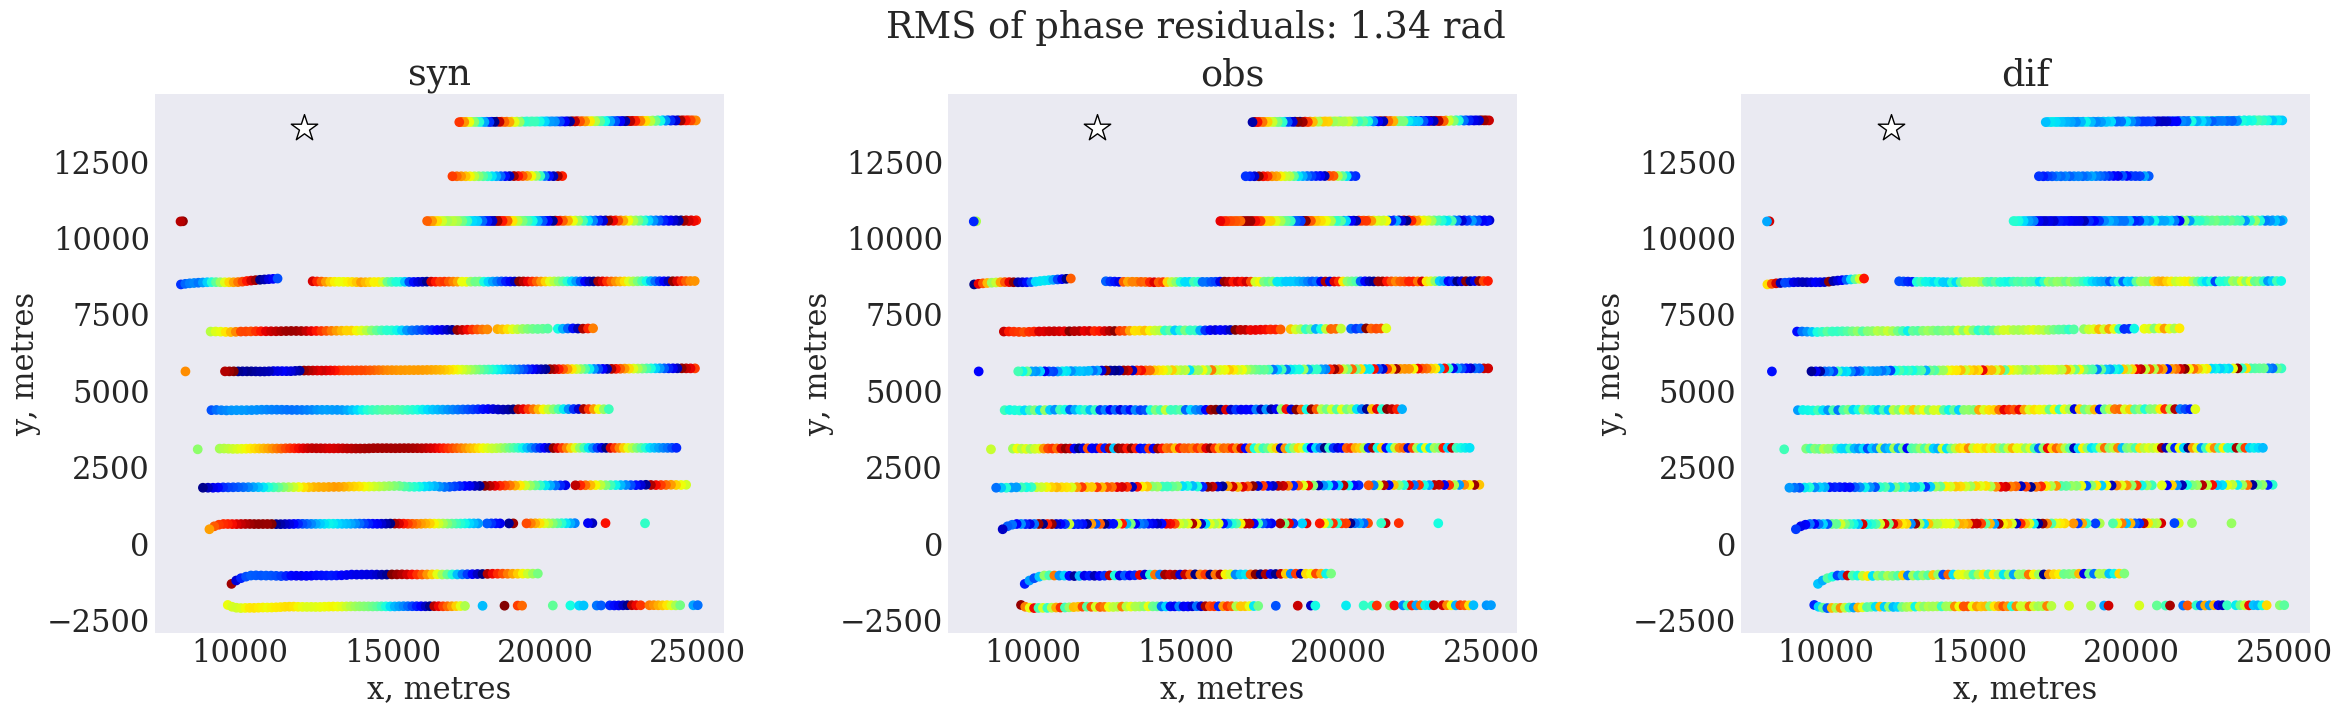

In [41]:
p14.o.dc.it[1][4105].plot_phase(freq=3, figsize=[29,7])

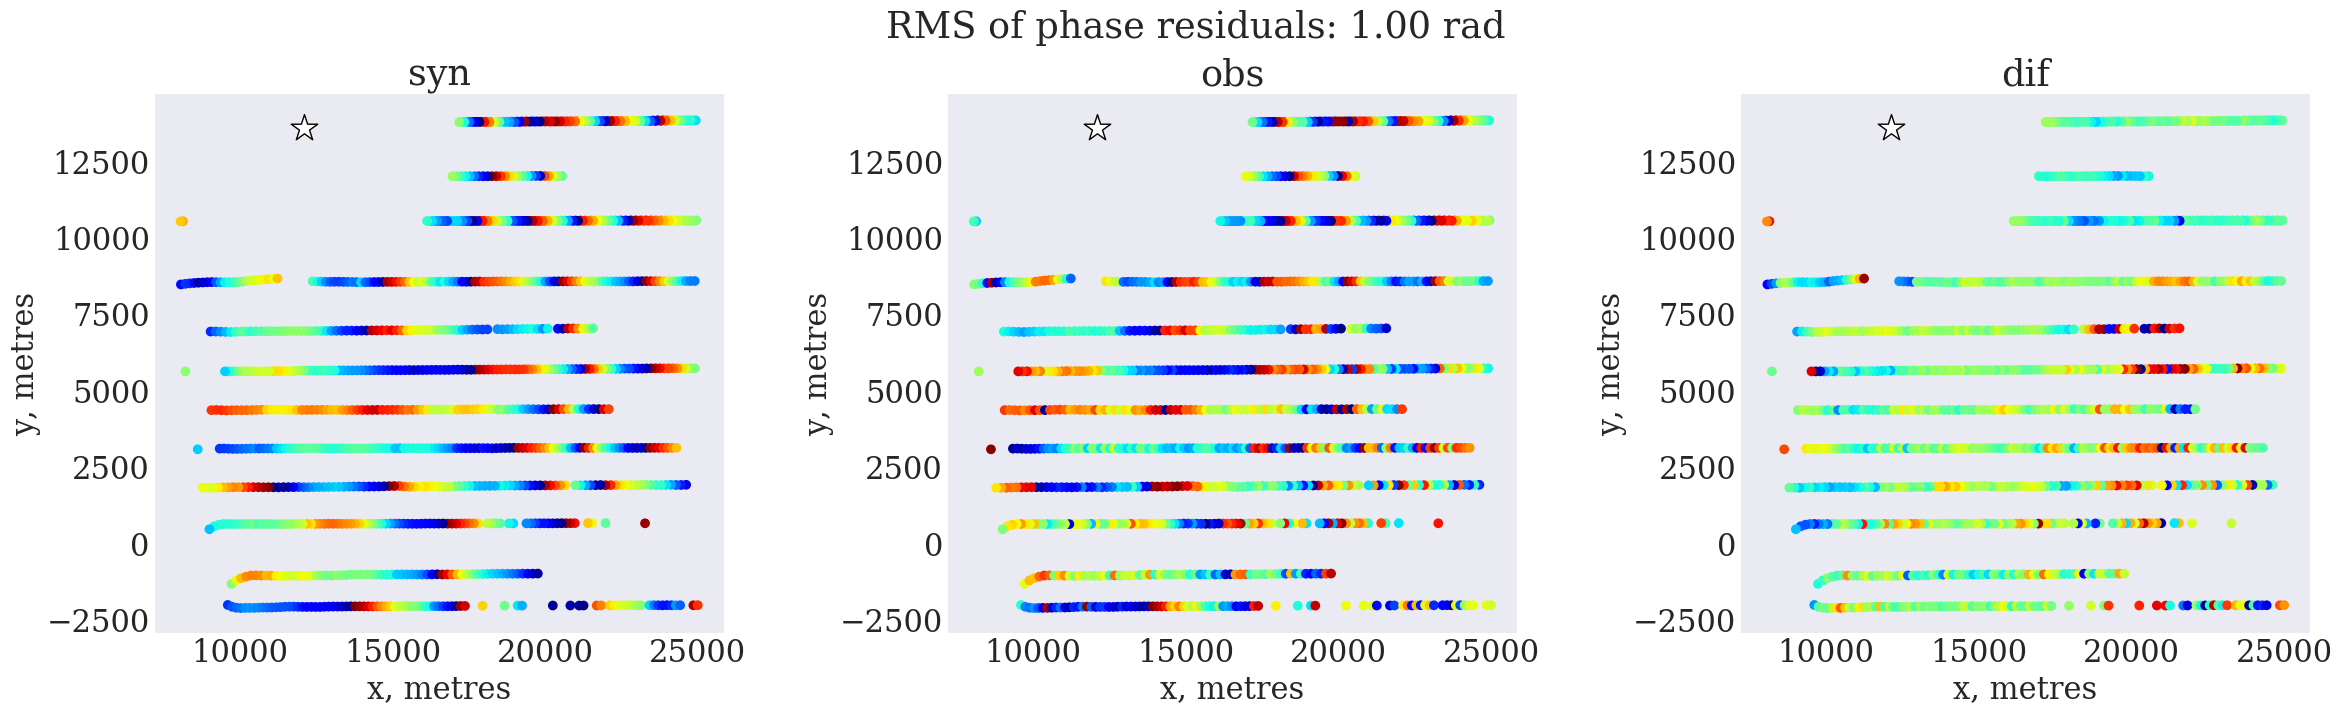

In [63]:
p14.o.dc.it[90][4105].plot_phase(freq=3, figsize=[29,7])

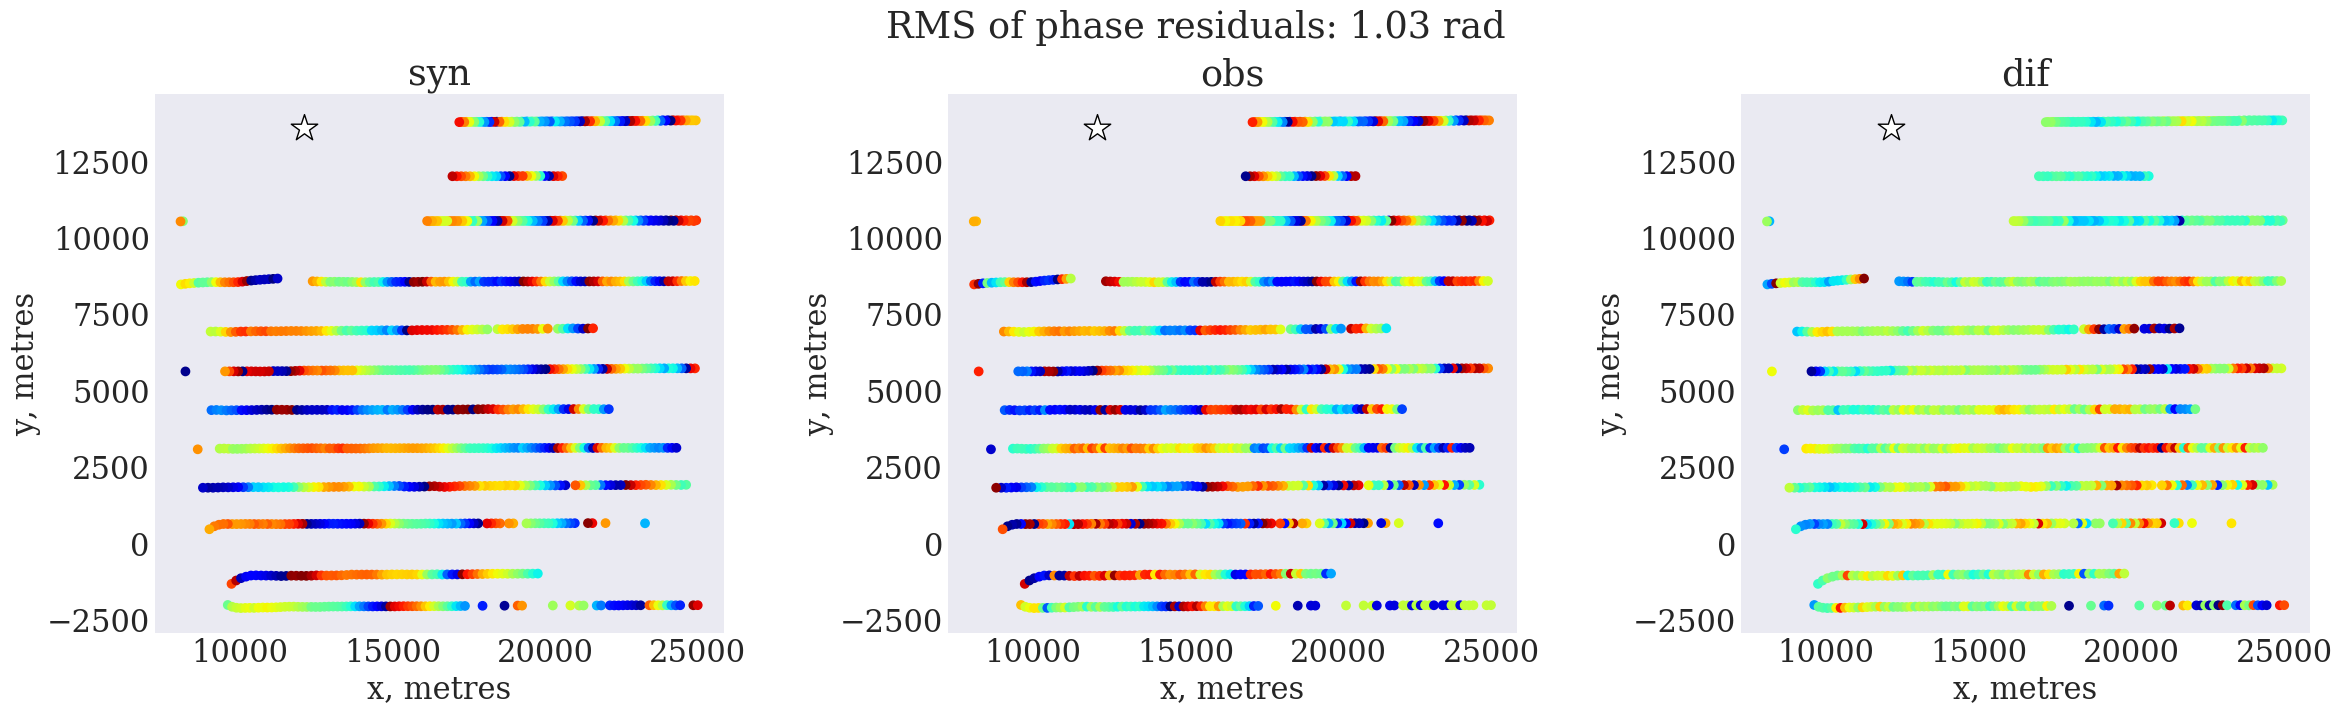

In [61]:
p14.o.dc.it[140][4105].plot_phase(freq=3, figsize=[29,7])

In [44]:
p14.o.dc.it[160][4105]

In [49]:
from fullwavepy.utils import get_phase

In [53]:
# get_phase(p14.o.dc.it[160][4105], freq=3)

In [45]:
# p14.o.dc.it[160][4105].plot_phase(freq=3, figsize=[29,7])

In [28]:
p14.o.dc.it[1][4105].read_header(freq=3).sample(4)

cdpt  counit  day  delrt    dt  ep   fldr  gain  gelev  gwdep  ...  \
247     1       1  332      0  2500   8  21072     0   -399    399  ...   
358     1       1  334      2  2500   7  24140     0   -399    399  ...   
450     1       1  336      4  2500  30  31607     0   -399    399  ...   
312     1       1  333      3  2500   6  22066     0   -399    399  ...   

     swdep     sx     sy  timbas  tracf  tracl  tracr  tstat  year  \
247    350  15990   4370     447   4105   4926  12353    250  2015   
358    213  12015   6944     860   4105   6313  12487    250  2015   
450    274   9369   8542     773   4105   9451  12631    250  2015   
312    457  20499  10559     164   4105   5414  12435    250  2015   

         offset3d  
247  10012.742382  
358   6659.331873  
450   5757.418606  
312   8932.051612  

[4 rows x 35 columns]

#### OBS 124

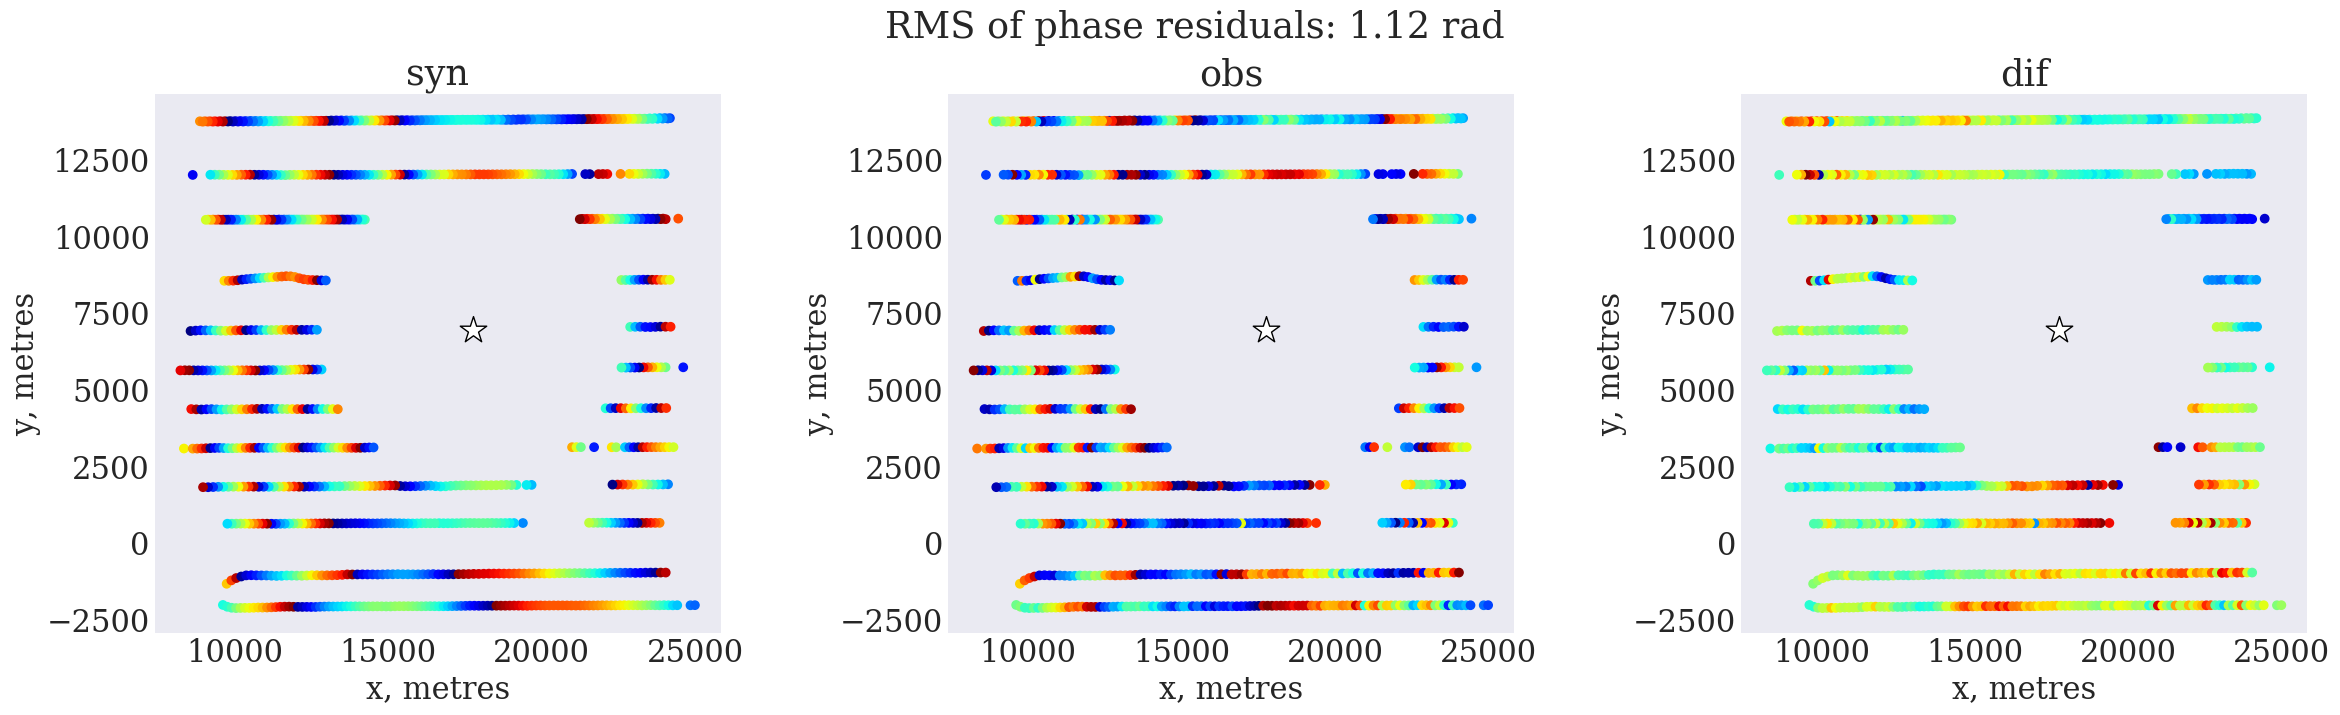

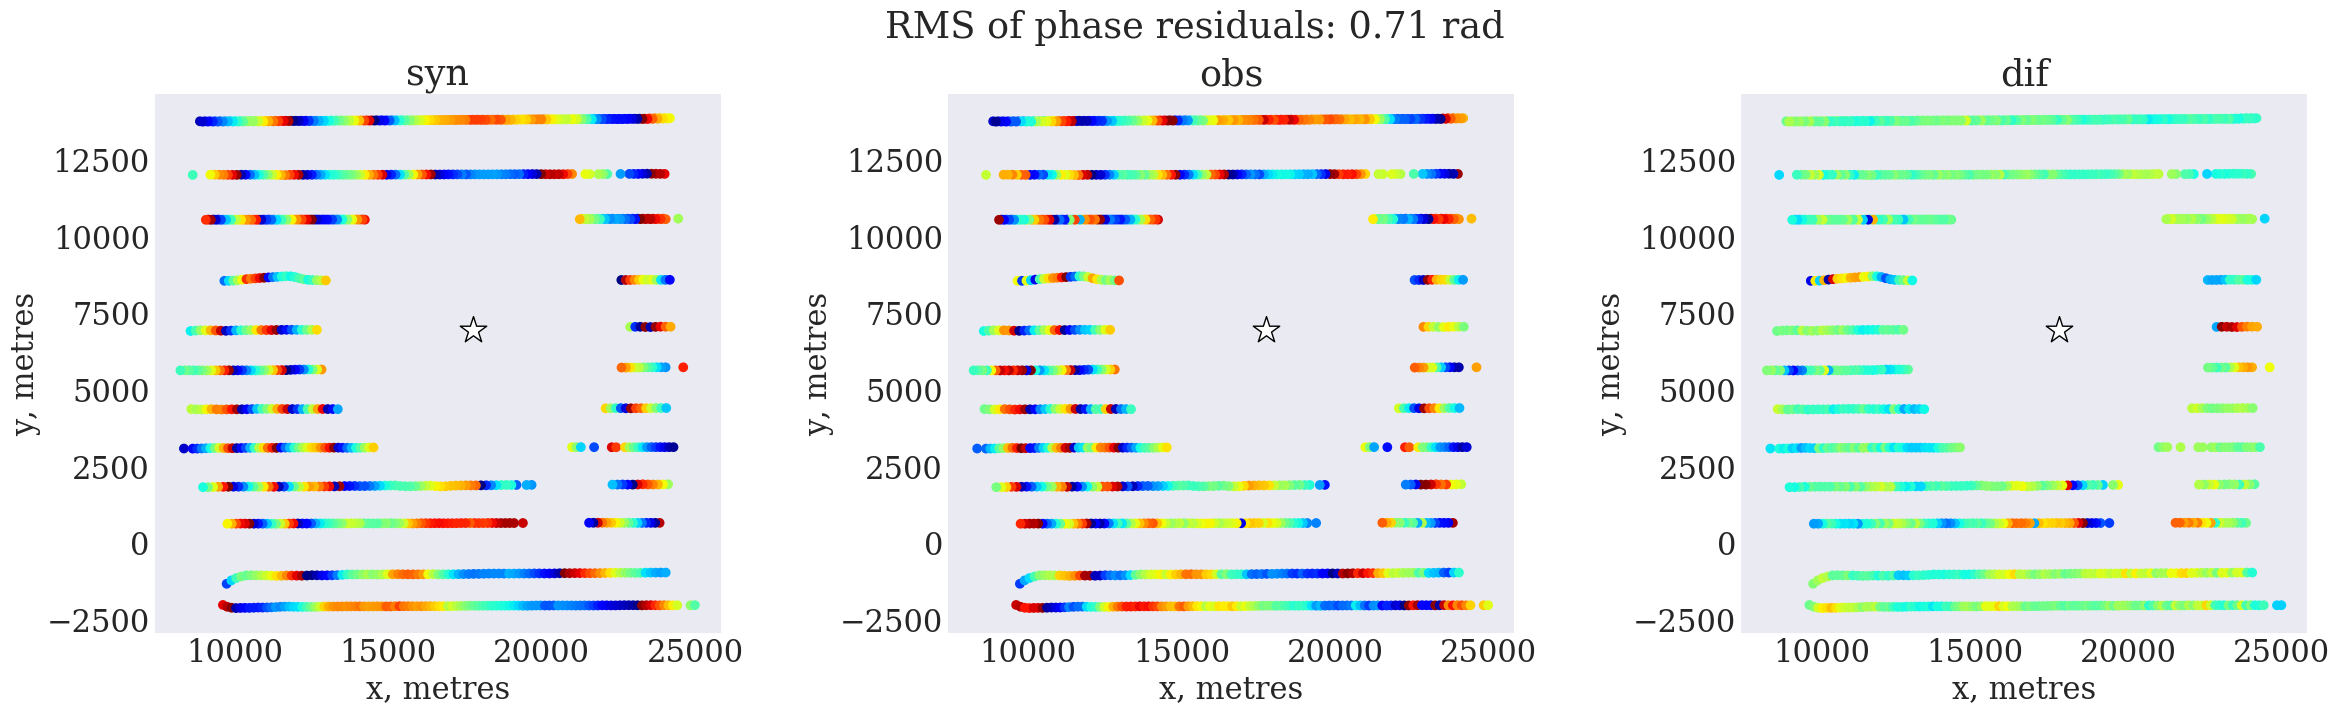

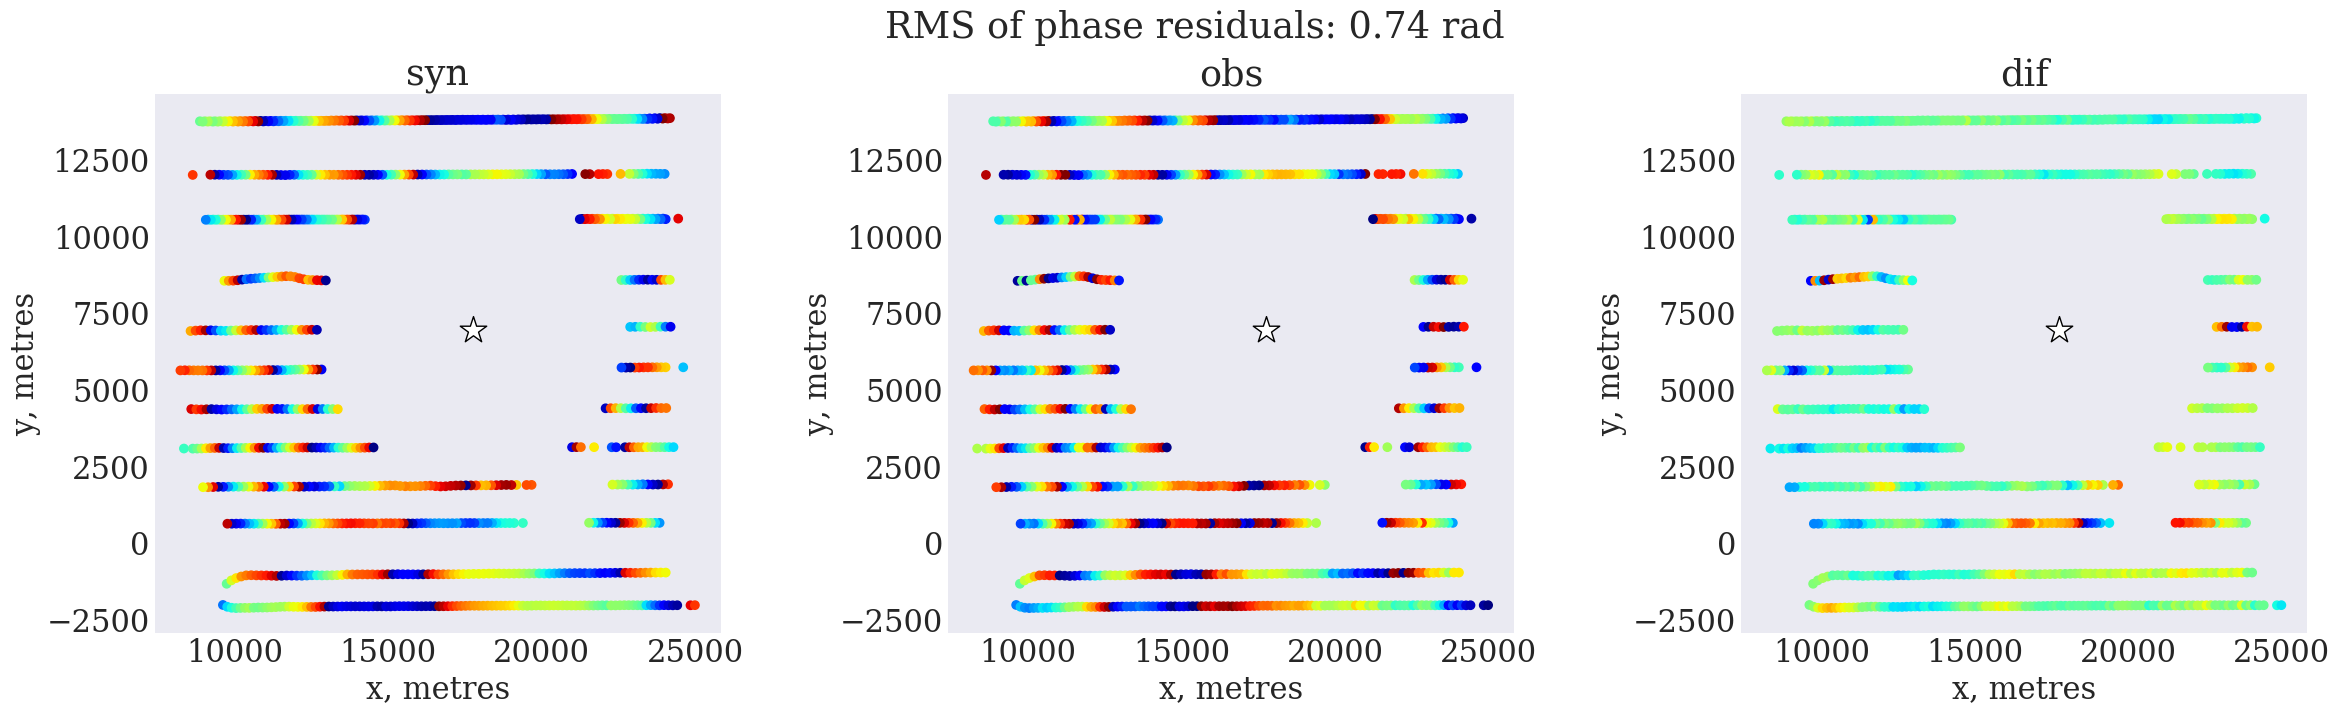

In [69]:
# 
sid = 4124
its = [1, 90, 140]
for it in its:
   p14.o.dc.it[it][sid].plot_phase(freq=3, figsize=[29,7]) 

### Old title-formatting

#### Fig. 
OBS 4157

##### a) 
Iteration 1.

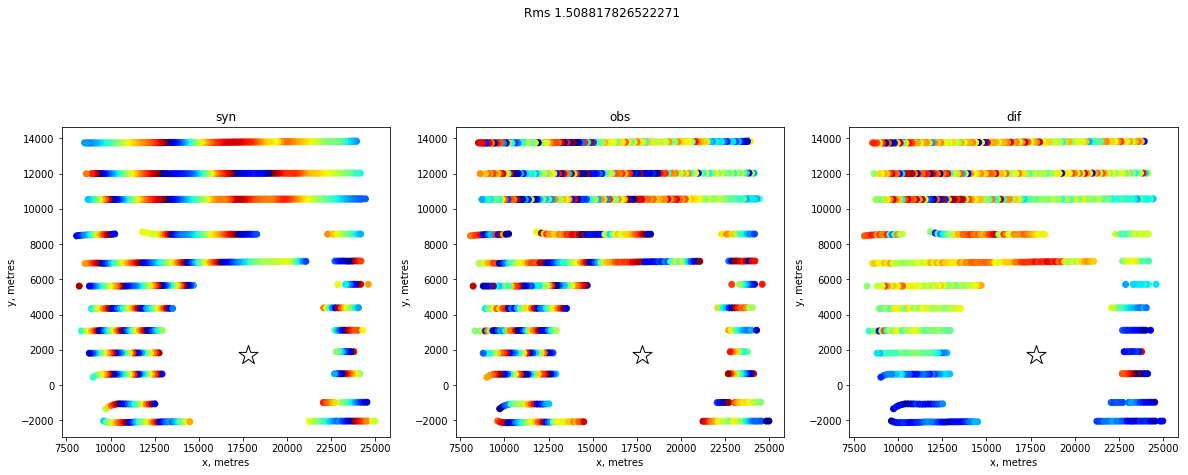

In [543]:
p14.out.dumpcomp.it[1][4157].plot_phase(freq=3)

##### b) 
Iteration 80.

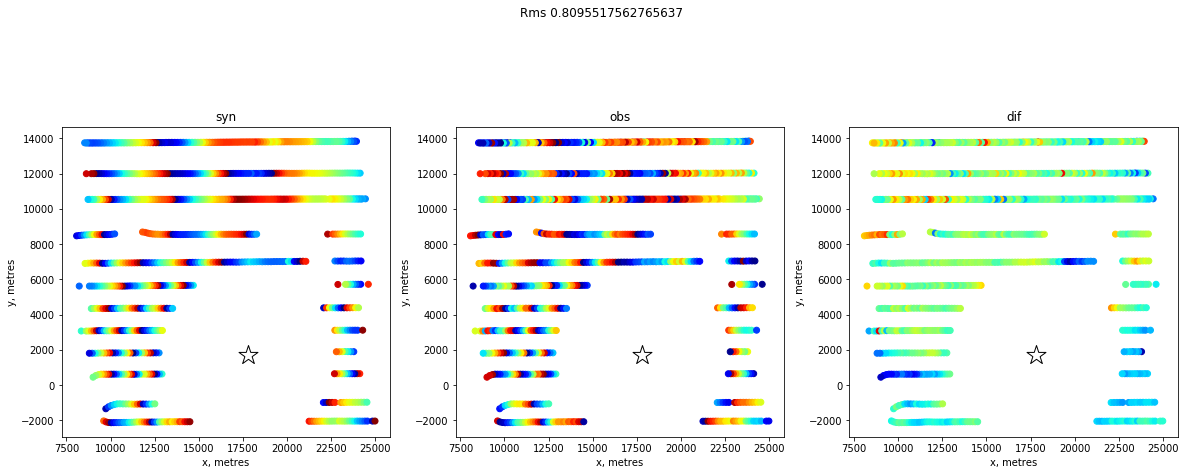

In [544]:
p14.out.dumpcomp.it[80][4157].plot_phase(freq=3)

#### Fig. 
OBS 4104

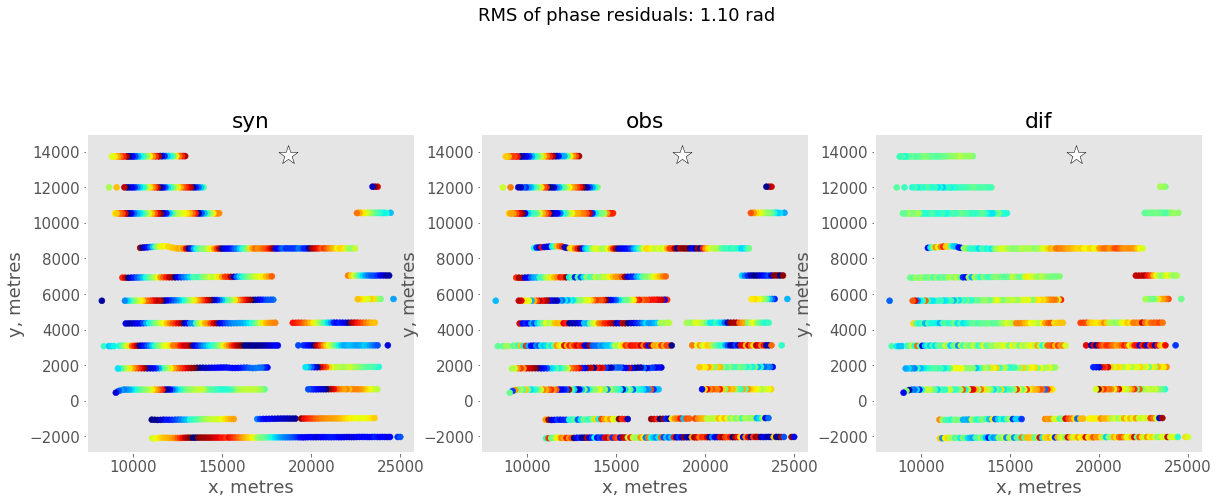

In [22]:
p14.o.dc.it[88][4104].plot_phase(freq=3)

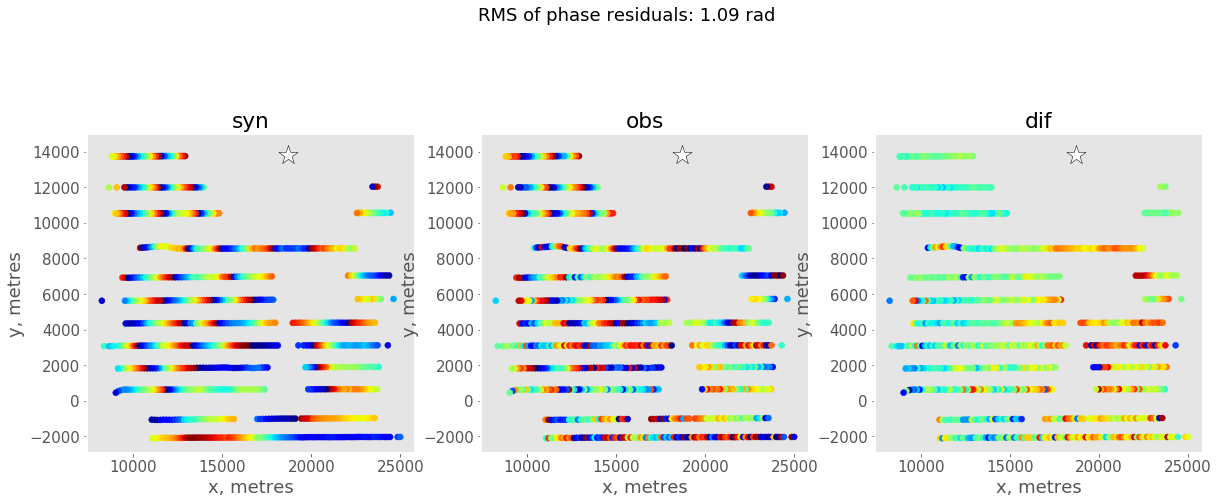

In [20]:
p14.o.dc.it[93][4104].plot_phase(freq=3)

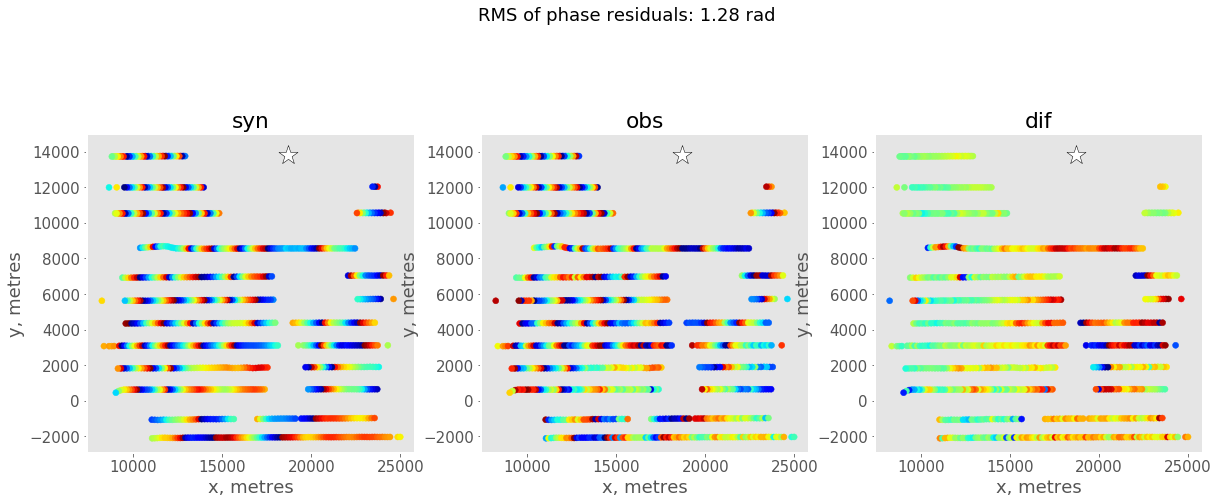

In [24]:
p14.o.dc.it[88][4104].plot_phase(freq=5)

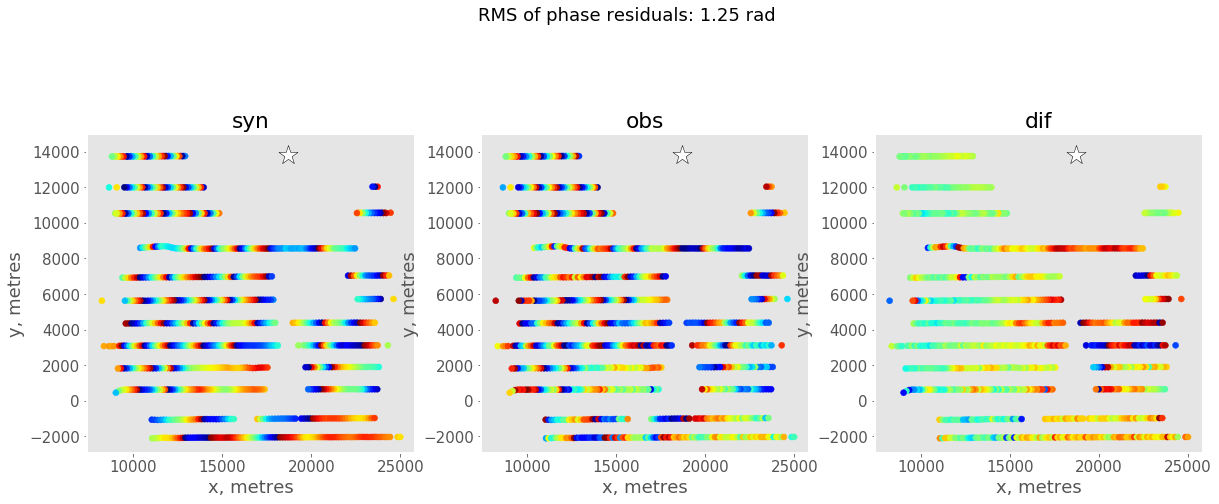

In [23]:
p14.o.dc.it[93][4104].plot_phase(freq=5)

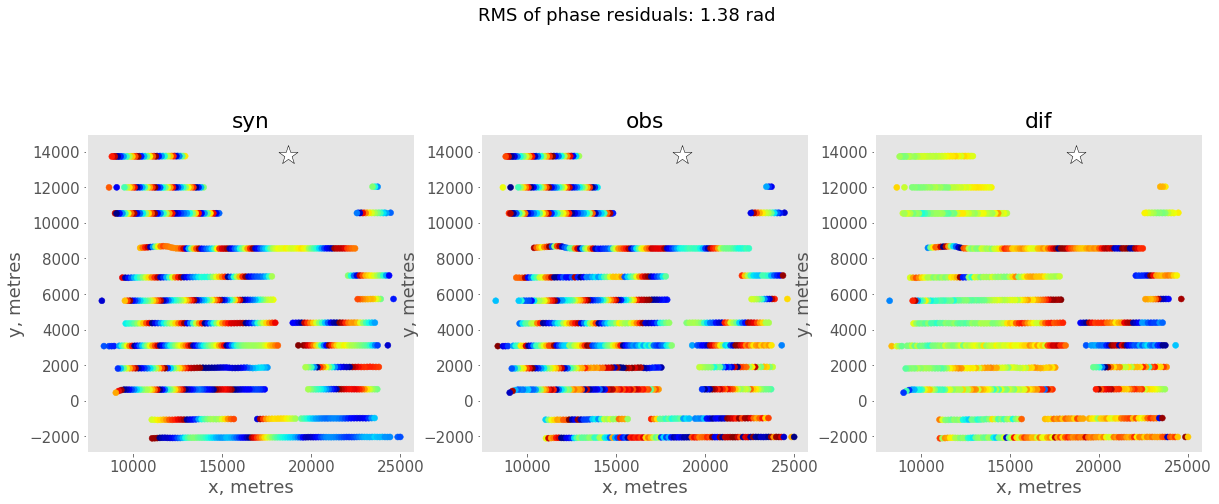

In [18]:
p14.o.dc.it[132][4104].plot_phase(freq=5)

# Waveform plots

### Old API

(5, 2.5)

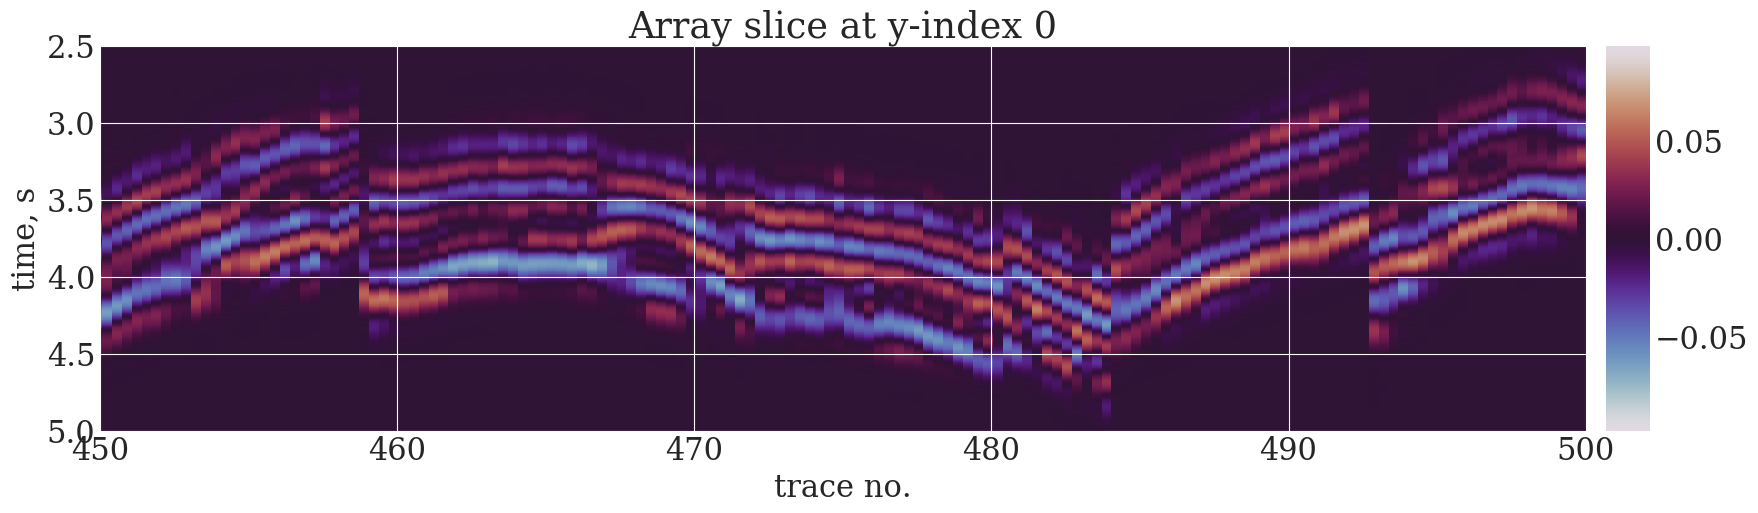

In [121]:
nshots, _, nsamps = p14.o.dc.it[1][4105].read()['syn'].shape
time = nsamps * dt # dt = 0.0025 s
figure(20,5)
p14.o.dc.it[1][4105].plot(cmap='twilight', extent=[[1,nshots],[0,1],[0,time+1]])
plt.grid()
plt.xlabel('trace no.')
plt.ylabel('time, s')
plt.xlim(450,500)
plt.ylim(5,2.5)

### New API

In [33]:
# nshots, _, nsamps = p14.o.dc.it[1][4105].read()['syn'].shape
# time = nsamps * dt # dt = 0.0025 s
dc = p14.o.dc.it[1][4105].read()
# figure(20,5)
# p14.o.dc.it[1][4105].plot(cmap='twilight', extent=[[1,nshots],[0,1],[0,time+1]])
# plt.grid()
# plt.xlabel('trace no.')
# plt.ylabel('time, s')
# plt.xlim(450,500)
# plt.ylim(5,2.5)

In [32]:
df = p14.o.dc.it[1][4105].read_header()
len(df)

1037

In [60]:
# df.ep

In [62]:
syn = Arr2d(dc['syn'][:,0,:])
obs = Arr2d(dc['obs'][:,0,:])

(2000.0, 1000.0)

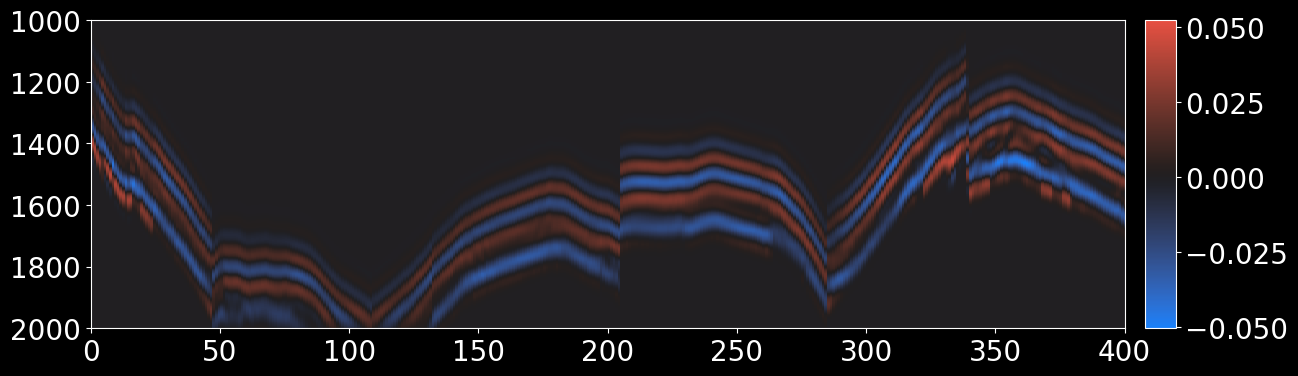

In [61]:
figure(14,4)
syn.plot(mode='imshow',
#          mode='shade', vert_exag=1e2,
         cmap='cet_bkr', #'twilight',
         aspect='auto',
        )
plt.xlim(0,400)
plt.ylim(2e3,1e3)

(2000.0, 1000.0)

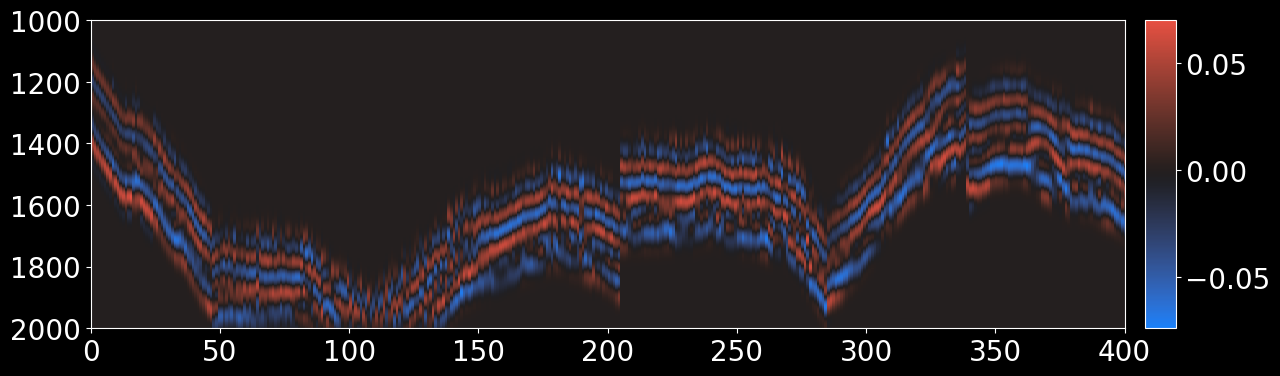

In [65]:
figure(14,4)
obs.plot(mode='imshow',
#          mode='shade', vert_exag=1e2,
         cmap='cet_bkr', #'twilight',
         aspect='auto',
        )
plt.xlim(0,400)
plt.ylim(2e3,1e3)

# ...